In [2]:
import torch

In [3]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])


In [4]:
x = torch.zeros([2,5])
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [5]:
y = torch.rand([2,5])
print(y)

tensor([[0.7395, 0.1442, 0.9396, 0.3784, 0.4556],
        [0.8655, 0.6757, 0.5340, 0.0796, 0.7724]])


In [8]:
#show in a given shape. Doesn't change y
y.view([1,10])

tensor([[0.7395, 0.1442, 0.9396, 0.3784, 0.4556, 0.8655, 0.6757, 0.5340, 0.0796,
         0.7724]])

In [10]:
import torch
import torchvision
from torchvision import transforms, datasets

In [13]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))



test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

 

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/Users/distiller/project/conda/conda-bld/pytorch_1591914925853/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [14]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [15]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [17]:
x,y = data[0][0], data[1][0]
print(y)

tensor(1)


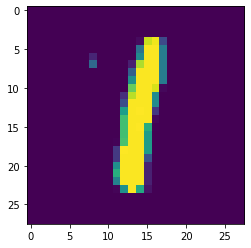

In [22]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [20]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [25]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [27]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


## now We build model

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()